# CREDIT CARD FRAUD DETECTION

## Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from xgboost import XGBClassifier

## Exploratory Data Analysis (EDA)

In [2]:
dataset=pd.read_csv("./creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Checking for any missing values

In [3]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
dataset.isnull().values.any()

False

### Checking for duplicate rows

In [5]:
dataset.duplicated().sum()

1081

### Checking info of dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking statistical of the features

In [7]:
dataset.drop("Class",axis=1).describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


### Distribution of the features

In [8]:
data=dataset.drop("Class",axis=1)
data.median()
data.mean()
data.mode()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,163152.0,1.245674,-0.326668,-2.752041,-0.842316,-0.562777,-1.011073,-0.432126,-0.160211,0.170362,...,-0.18037,-0.262581,-0.816264,0.020675,0.357827,0.186423,-0.398828,-0.035866,-0.060282,1.0
1,NaN,2.055797,0.166975,0.488306,0.635322,2.463072,3.173856,0.014953,0.727706,0.608606,...,-0.13208,0.269765,0.844627,0.140304,0.726212,0.366624,0.096544,0.027735,0.018495,NaN


In [9]:
pd.DataFrame({"Median":data.median(),"Mean":data.mean(),"Mode1":data.mode().iloc[0],"Mode2":data.mode().iloc[1]})

,Median,Mean,Mode1,Mode2
Time,84692.000000,9.481386e+04,163152.000000,NaN
V1,0.018109,1.168375e-15,1.245674,2.055797
V2,0.065486,3.416908e-16,-0.326668,0.166975
V3,0.179846,-1.379537e-15,-2.752041,0.488306
V4,-0.019847,2.074095e-15,-0.842316,0.635322
V5,-0.054336,9.604066e-16,-0.562777,2.463072
V6,-0.274187,1.487313e-15,-1.011073,3.173856
V7,0.040103,-5.556467e-16,-0.432126,0.014953
V8,0.022358,1.213481e-16,-0.160211,0.727706
V9,-0.051429,-2.406331e-15,0.170362,0.608606


In [10]:
columns=dataset.columns
columns_dist=columns.drop("Class")

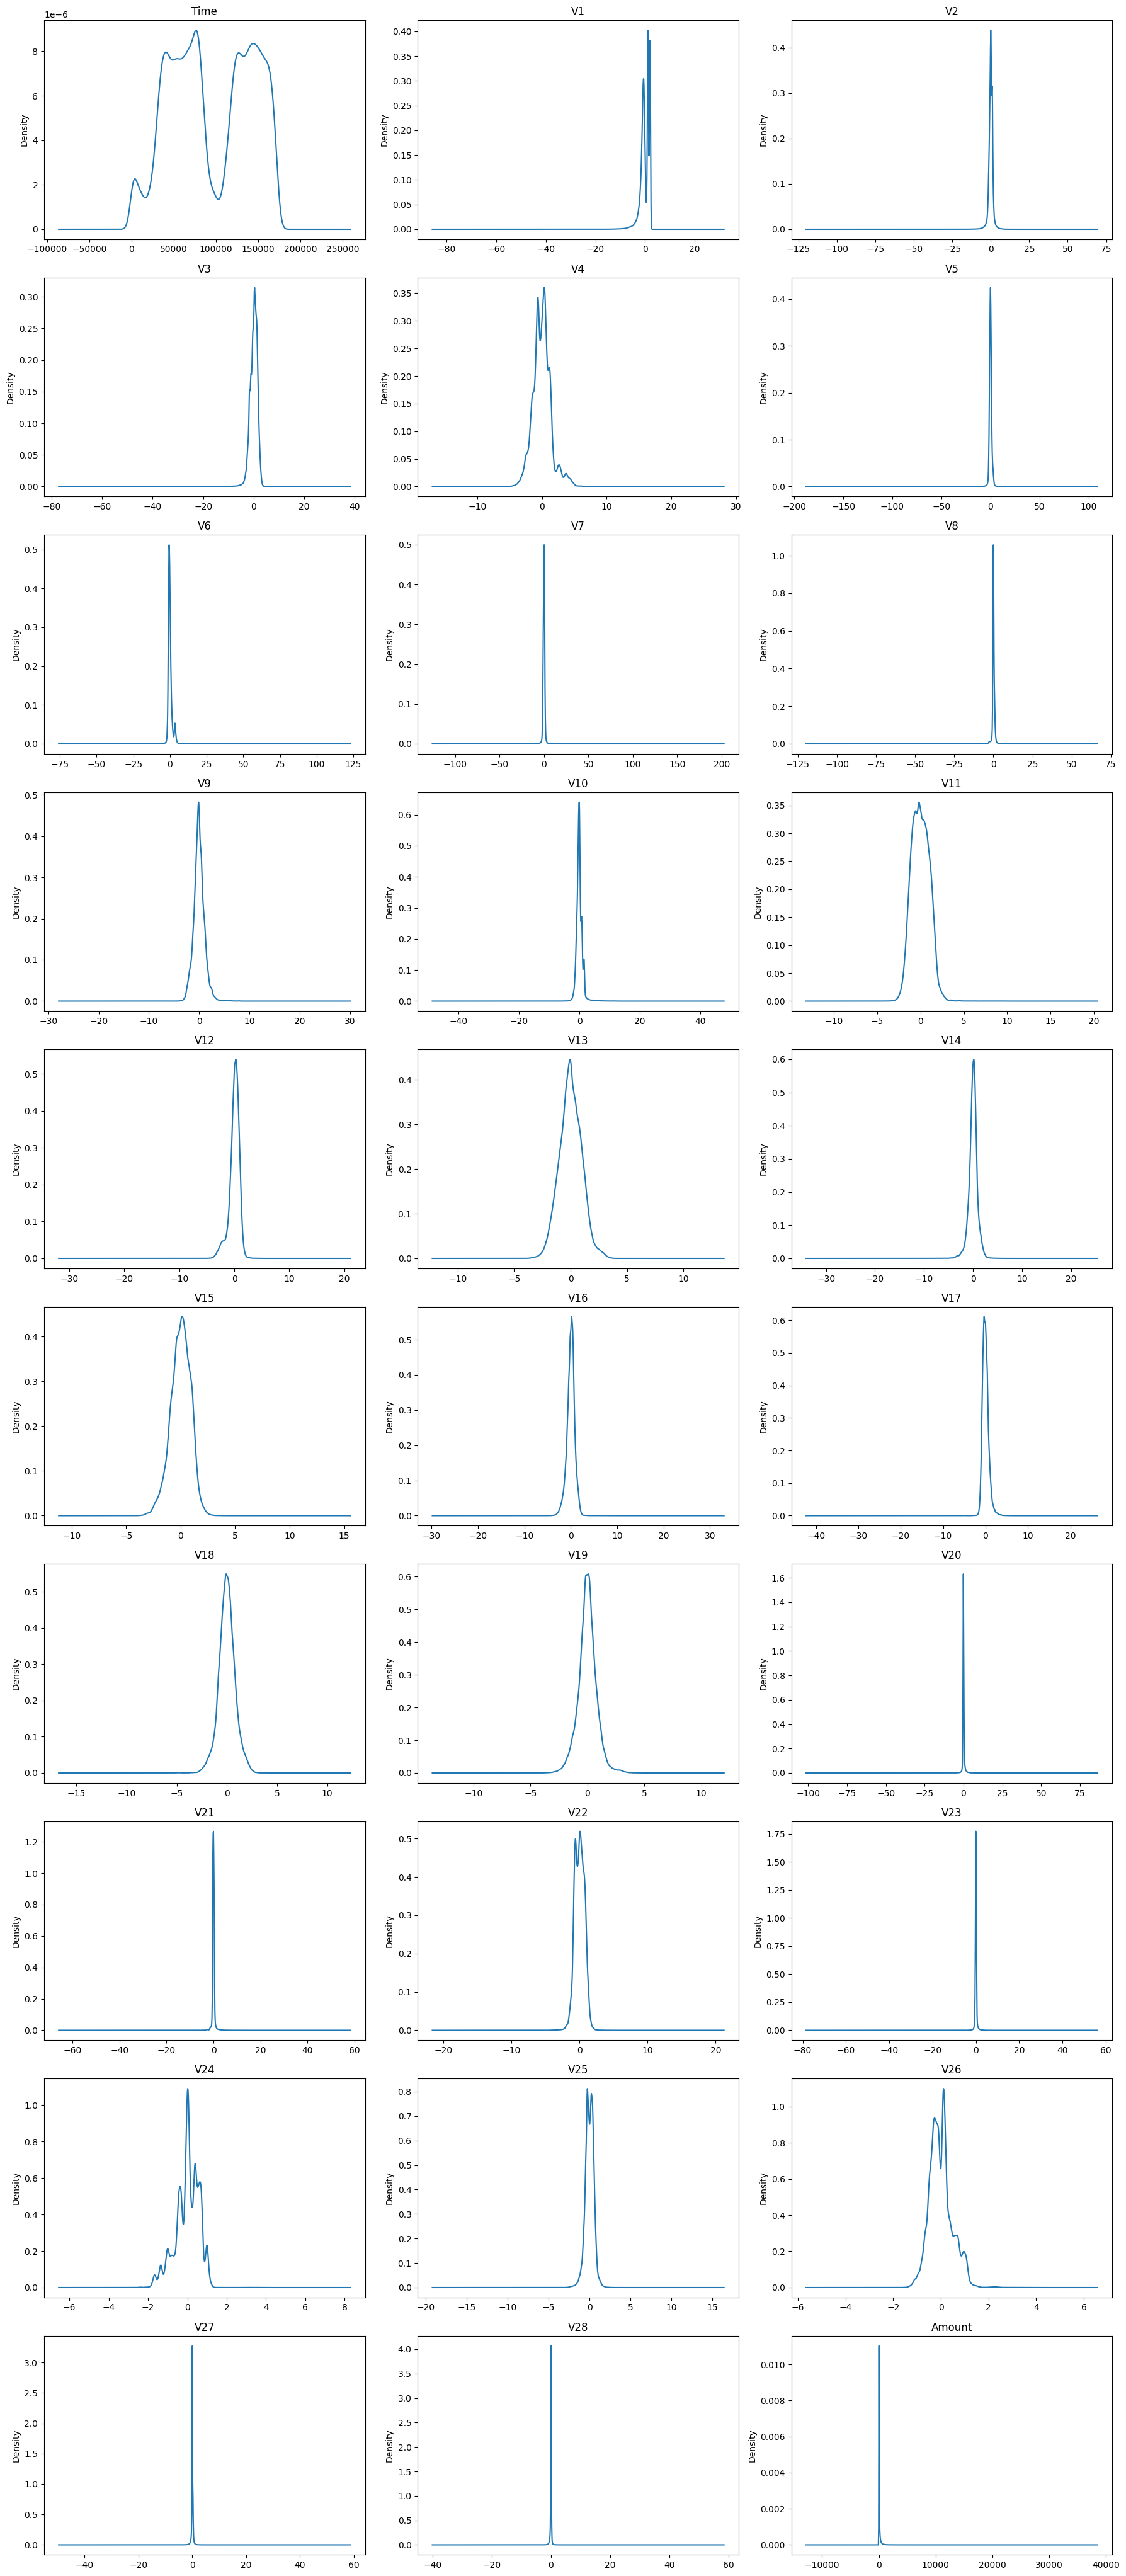

In [11]:
import math
fig, ax = plt.subplots(nrows=math.ceil(len(columns_dist)/3), ncols=3, figsize=(18,4*len(dataset.columns)//3))

for i, column in enumerate(columns_dist):
    dataset[column].plot(kind='kde', ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title(column)
plt.tight_layout()
plt.show()

### Correlation matrix

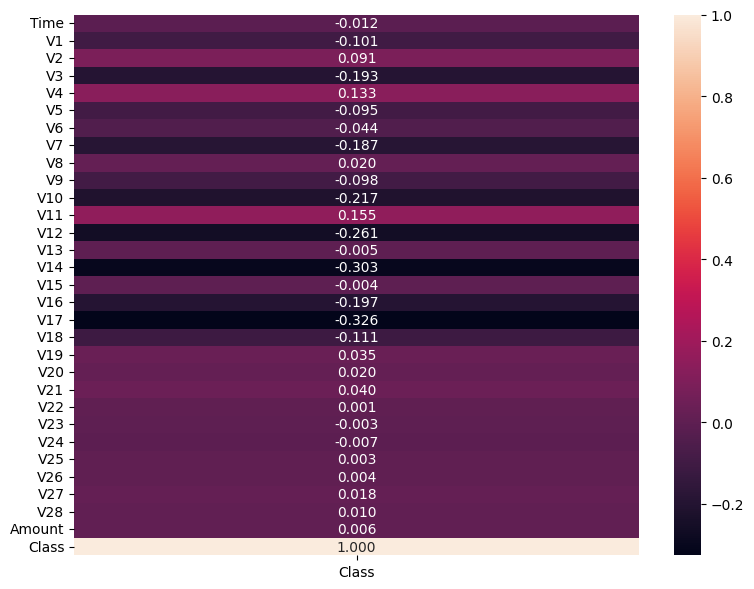

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(method="pearson")[["Class"]],annot=True,fmt=".3f")
plt.tight_layout()

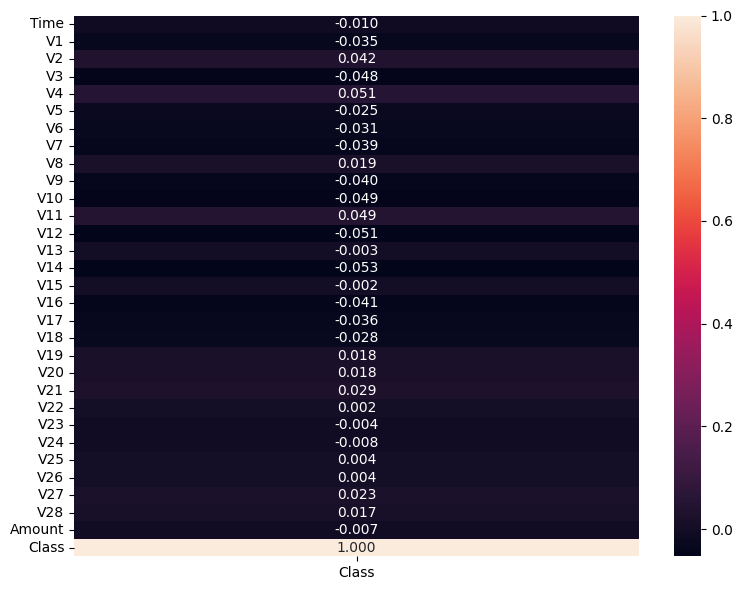

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(method="kendall")[["Class"]],annot=True,fmt=".3f")
plt.tight_layout()

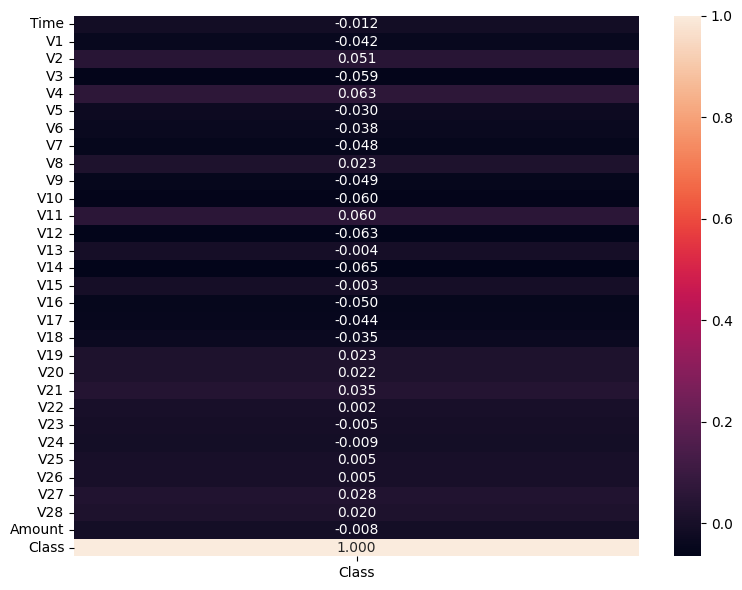

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(method="spearman")[["Class"]],annot=True,fmt=".3f")
plt.tight_layout()

### Correlation Method

pearson is suitable for normally distributed data

kendall is suitable for non-normally distributed data

spearman is suitable for non-normally distributed data

kendall is more suitable for data with outliers

spearman is more suitable for data without outliers

### Bar Plot of Class Distribution

In [15]:
# dataset['Class'].value_counts().reset_index(name="Count")

In [16]:
print(dataset["Class"].value_counts().index)
dataset["Class"].value_counts().values

Index([0, 1], dtype='int64', name='Class')


array([284315,    492], dtype=int64)

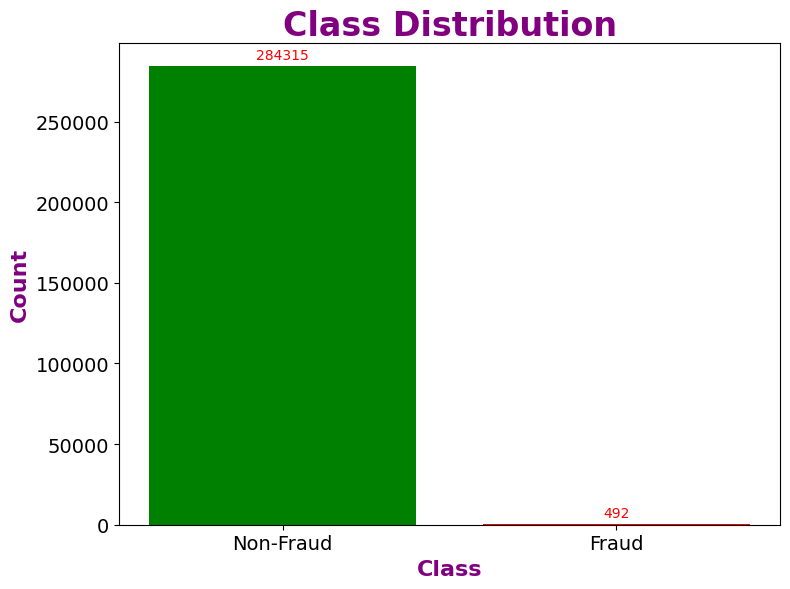

In [17]:
plt.figure(figsize=(8,6))
plt.bar(dataset["Class"].value_counts().index,dataset["Class"].value_counts().values)

plt.bar_label(container=plt.bar(dataset["Class"].value_counts().index,dataset["Class"].value_counts().values,color=["green","red"]),color="red",padding=3)
plt.xticks([0,1],["Non-Fraud","Fraud"],fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Class",fontsize=16,color="purple",fontweight="bold")
plt.ylabel("Count",fontsize=16,color="purple",fontweight="bold")
plt.title("Class Distribution",fontsize=24,color="purple",fontweight="bold")

# plt.legend()
plt.tight_layout()
plt.show()

### Analyzing before plotting graph of Variation of Amount per Class

In [18]:
fraud=dataset[dataset["Class"]==1]
nonfraud=dataset[dataset["Class"]==0]
fraud.shape,nonfraud.shape

((492, 31), (284315, 31))

In [19]:
print(f"Percentage of Fraud Transactions: {round(fraud.shape[0]/dataset.shape[0]*100,2)}%")

Percentage of Fraud Transactions: 0.17%


In [20]:
fraud["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [21]:
nonfraud["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### Histogram of Variation Amount per Class

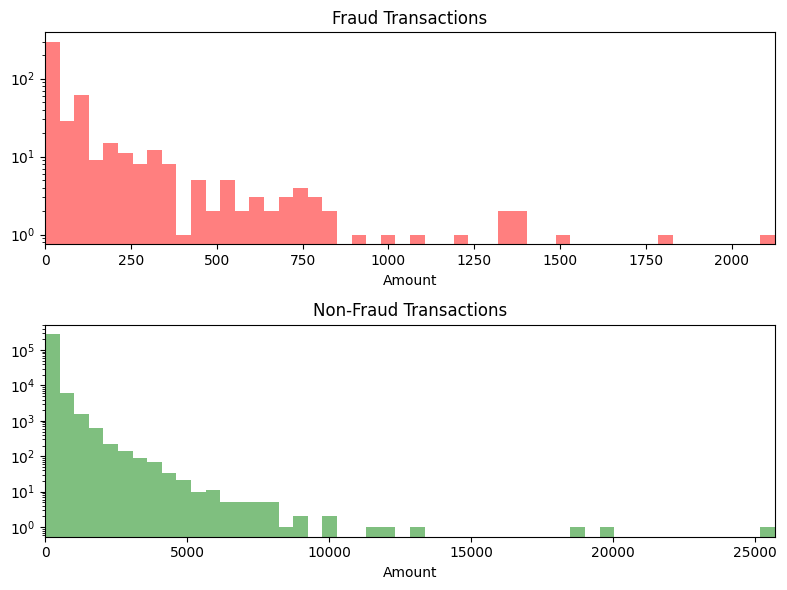

In [22]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(8,6))
ax1.hist(fraud["Amount"],bins=50,color="red",alpha=0.5,label="Fraud")
ax1.set_title("Fraud Transactions")
ax1.set_xlabel("Amount")
ax1.set_yscale("log")
ax1.set_xlim(0,fraud["Amount"].max())

ax2.hist(nonfraud["Amount"],bins=50,color="green",alpha=0.5,label="Non-Fraud")
ax2.set_title("Non-Fraud Transactions")
ax2.set_yscale("log")
ax2.set_xlabel("Amount")
ax2.set_xlim(0,nonfraud["Amount"].max())
plt.tight_layout()

## Data Preprocessing

### Removing Duplicate rows

In [23]:
dataset.shape

(284807, 31)

In [24]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(283726, 31)

### Droping Time Attribute
It is of no use to build the models and may not impact our target variable.

In [25]:
dataset.drop("Time",axis=1,inplace=True)

### Split into x and y

In [26]:
x=dataset.drop("Class",axis=1)
y=dataset["Class"]
x.shape,y.shape

((283726, 29), (283726,))

### Standardization Amount attribute values using StandardScaler

In [27]:
std=StandardScaler()
x["Amount"]=std.fit_transform(x["Amount"].values.reshape(-1,1))
x["Amount"]

0         0.244200
1        -0.342584
2         1.158900
3         0.139886
4        -0.073813
            ...   
284802   -0.350252
284803   -0.254325
284804   -0.082239
284805   -0.313391
284806    0.513290
Name: Amount, Length: 283726, dtype: float64

In [28]:
# Normalization Amount attribute values using MinMaxScaler
# x_mm=x.copy()
# x_mm
# minmax=MinMaxScaler()
# x_mm["Amount"]=minmax.fit_transform(x["Amount"].values.reshape(-1,1))
# x_mm["Amount"]

### Split the Dataset into Training and Testing Sets

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

# x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

x_train.shape,x_test.shape

((226980, 29), (56746, 29))

### Logistic Regression

In [30]:
LR=LogisticRegression()
print("Model fitting...")
LR.fit(x_train,y_train)
print("Model fitted!\n")

print("Training Dataset")
cr=classification_report(y_train,LR.predict(x_train),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_train,LR.predict(x_train))}\n")

# print("Validation Dataset")
# cr=classification_report(y_val,LR.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,LR.predict(x_val))}\n")

print("Testing Dataset")
cr=classification_report(y_test,LR.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,LR.predict(x_test))}\n")

# fig,ax=plt.subplots(3,1,figsize=(6,4*3))
# sns.heatmap(confusion_matrix(y_train,LR.predict(x_train)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0])
# ax[0].set_title("Confusion Matrix Training Dataset",color="orange",fontsize=16)
# ax[0].set_xlabel("Predicted Label")
# ax[0].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_val,LR.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1])
# ax[1].set_title("Confusion Matrix Validation Dataset",color="orange",fontsize=16)
# ax[1].set_xlabel("Predicted Label")
# ax[1].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_test,LR.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2])
# ax[2].set_title("Confusion Matrix Testing Dataset",color="orange",fontsize=16)
# ax[2].set_xlabel("Predicted Label")
# ax[2].set_ylabel("Actual Label")

# plt.tight_layout()
# plt.show()

Model fitting...
Model fitted!

Training Dataset
Classification Report:
              precision    recall  f1-score   support

           0    0.99940   0.99985   0.99962    226602
           1    0.87636   0.63757   0.73813       378

    accuracy                        0.99925    226980
   macro avg    0.93788   0.81871   0.86888    226980
weighted avg    0.99919   0.99925   0.99919    226980

Accuracy Score: 0.9992466296590008

Testing Dataset
Classification Report:
              precision    recall  f1-score   support

           0    0.99933   0.99982   0.99958     56651
           1    0.85075   0.60000   0.70370        95

    accuracy                        0.99915     56746
   macro avg    0.92504   0.79991   0.85164     56746
weighted avg    0.99908   0.99915   0.99908     56746

Accuracy Score: 0.9991541254009093



### Decision Tree

In [31]:
DT=DecisionTreeClassifier()
print("Model fitting...")
DT.fit(x_train,y_train)
print("Model fitted!\n")

print("Training Dataset")
cr=classification_report(y_train,DT.predict(x_train),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_train,DT.predict(x_train))}\n")

# print("Validation Dataset")
# cr=classification_report(y_val,DT.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,DT.predict(x_val))}\n")

print("Testing Dataset")
cr=classification_report(y_test,DT.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,DT.predict(x_test))}\n")

# fig,ax=plt.subplots(3,1,figsize=(6,4*3))
# sns.heatmap(confusion_matrix(y_train,DT.predict(x_train)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0])
# ax[0].set_title("Confusion Matrix Training Dataset",color="orange",fontsize=16)
# ax[0].set_xlabel("Predicted Label")
# ax[0].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_val,DT.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1])
# ax[1].set_title("Confusion Matrix Validation Dataset",color="orange",fontsize=16)
# ax[1].set_xlabel("Predicted Label")
# ax[1].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_test,DT.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2])
# ax[2].set_title("Confusion Matrix Testing Dataset",color="orange",fontsize=16)
# ax[2].set_xlabel("Predicted Label")
# ax[2].set_ylabel("Actual Label")

# plt.tight_layout()
# plt.show()

Model fitting...
Model fitted!

Training Dataset
Classification Report:
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000    226602
           1    1.00000   1.00000   1.00000       378

    accuracy                        1.00000    226980
   macro avg    1.00000   1.00000   1.00000    226980
weighted avg    1.00000   1.00000   1.00000    226980

Accuracy Score: 1.0

Testing Dataset
Classification Report:
              precision    recall  f1-score   support

           0    0.99949   0.99954   0.99951     56651
           1    0.71739   0.69474   0.70588        95

    accuracy                        0.99903     56746
   macro avg    0.85844   0.84714   0.85270     56746
weighted avg    0.99902   0.99903   0.99902     56746

Accuracy Score: 0.9990307686885419



### Random Forest

In [32]:
RF=RandomForestClassifier(random_state=42)
print("Model fitting...")
RF.fit(x_train,y_train)
print("Model fitted!\n")

print("Training Dataset")
cr=classification_report(y_train,RF.predict(x_train),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_train,RF.predict(x_train))}\n")

# print("Validation Dataset")
# cr=classification_report(y_val,RF.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,RF.predict(x_val))}\n")

print("Testing Dataset")
cr=classification_report(y_test,RF.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,RF.predict(x_test))}\n")

# fig,ax=plt.subplots(3,1,figsize=(6,4*3))
# sns.heatmap(confusion_matrix(y_train,RF.predict(x_train)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0])
# ax[0].set_title("Confusion Matrix Training Dataset",color="orange",fontsize=16)
# ax[0].set_xlabel("Predicted Label")
# ax[0].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_val,RF.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1])
# ax[1].set_title("Confusion Matrix Validation Dataset",color="orange",fontsize=16)
# ax[1].set_xlabel("Predicted Label")
# ax[1].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_test,RF.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2])
# ax[2].set_title("Confusion Matrix Testing Dataset",color="orange",fontsize=16)
# ax[2].set_xlabel("Predicted Label")
# ax[2].set_ylabel("Actual Label")

# plt.tight_layout()
# plt.show()

Model fitting...
Model fitted!

Training Dataset
Classification Report:
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000    226602
           1    1.00000   0.99735   0.99868       378

    accuracy                        1.00000    226980
   macro avg    1.00000   0.99868   0.99934    226980
weighted avg    1.00000   1.00000   1.00000    226980

Accuracy Score: 0.9999955943254912

Testing Dataset
Classification Report:
              precision    recall  f1-score   support

           0    0.99956   0.99996   0.99976     56651
           1    0.97222   0.73684   0.83832        95

    accuracy                        0.99952     56746
   macro avg    0.98589   0.86840   0.91904     56746
weighted avg    0.99951   0.99952   0.99949     56746

Accuracy Score: 0.9995241955380115



### Extreme Gradient Boosting

In [33]:
XGB=XGBClassifier()
print("Model fitting...")
XGB.fit(x_train,y_train)
print("Model fitted!\n")

print("Training Dataset")
cr=classification_report(y_train,XGB.predict(x_train),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_train,XGB.predict(x_train))}\n")

# print("Validation Dataset")
# cr=classification_report(y_val,XGB.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,XGB.predict(x_val))}\n")

print("Testing Dataset")
cr=classification_report(y_test,XGB.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,XGB.predict(x_test))}\n")

# fig,ax=plt.subplots(3,1,figsize=(6,4*3))
# sns.heatmap(confusion_matrix(y_train,XGB.predict(x_train)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0])
# ax[0].set_title("Confusion Matrix Training Dataset",color="orange",fontsize=16)
# ax[0].set_xlabel("Predicted Label")
# ax[0].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_val,XGB.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1])
# ax[1].set_title("Confusion Matrix Validation Dataset",color="orange",fontsize=16)
# ax[1].set_xlabel("Predicted Label")
# ax[1].set_ylabel("Actual Label")

# sns.heatmap(confusion_matrix(y_test,XGB.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2])
# ax[2].set_title("Confusion Matrix Testing Dataset",color="orange",fontsize=16)
# ax[2].set_xlabel("Predicted Label")
# ax[2].set_ylabel("Actual Label")

# plt.tight_layout()
# plt.show()

Model fitting...
Model fitted!

Training Dataset
Classification Report:
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000    226602
           1    1.00000   1.00000   1.00000       378

    accuracy                        1.00000    226980
   macro avg    1.00000   1.00000   1.00000    226980
weighted avg    1.00000   1.00000   1.00000    226980

Accuracy Score: 1.0

Testing Dataset
Classification Report:
              precision    recall  f1-score   support

           0    0.99958   0.99996   0.99977     56651
           1    0.97260   0.74737   0.84524        95

    accuracy                        0.99954     56746
   macro avg    0.98609   0.87367   0.92250     56746
weighted avg    0.99953   0.99954   0.99951     56746

Accuracy Score: 0.9995418179254926



### Classification Report LR vs DT vs RF vs XGB in Data Validation

In [34]:
# print("Validation Dataset\n")

# print("-- Logistic Regression --")
# cr=classification_report(y_val,LR.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,LR.predict(x_val))}\n")

# print("-- Decision Tree --")
# cr=classification_report(y_val,DT.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,DT.predict(x_val))}\n")

# print("-- Random Forest --")
# cr=classification_report(y_val,RF.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,RF.predict(x_val))}\n")

# print("-- Extreme Gradient Boosting --")
# cr=classification_report(y_val,XGB.predict(x_val))
# print(f"Classification Report:\n{cr}")
# print(f"Accuracy Score: {accuracy_score(y_val,XGB.predict(x_val))}\n")

### Classification Report LR vs DT vs RF vs XGB in Data Testing

In [35]:
print("Testing Dataset\n")

print("-- Logistic Regression --")
cr=classification_report(y_test,LR.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,LR.predict(x_test))}\n")

print("-- Decision Tree --")
cr=classification_report(y_test,DT.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,DT.predict(x_test))}\n")

print("-- Random Forest --")
cr=classification_report(y_test,RF.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,RF.predict(x_test))}\n")

print("-- Extreme Gradient Boosting --")
cr=classification_report(y_test,XGB.predict(x_test),digits=5)
print(f"Classification Report:\n{cr}")
print(f"Accuracy Score: {accuracy_score(y_test,XGB.predict(x_test))}\n")

Testing Dataset

-- Logistic Regression --
Classification Report:
              precision    recall  f1-score   support

           0    0.99933   0.99982   0.99958     56651
           1    0.85075   0.60000   0.70370        95

    accuracy                        0.99915     56746
   macro avg    0.92504   0.79991   0.85164     56746
weighted avg    0.99908   0.99915   0.99908     56746

Accuracy Score: 0.9991541254009093

-- Decision Tree --
Classification Report:
              precision    recall  f1-score   support

           0    0.99949   0.99954   0.99951     56651
           1    0.71739   0.69474   0.70588        95

    accuracy                        0.99903     56746
   macro avg    0.85844   0.84714   0.85270     56746
weighted avg    0.99902   0.99903   0.99902     56746

Accuracy Score: 0.9990307686885419

-- Random Forest --
Classification Report:
              precision    recall  f1-score   support

           0    0.99956   0.99996   0.99976     56651
           1 

### Confusion Matrix LR vs DT vs RF vs XGB in Data Validation

In [36]:
# fig,ax=plt.subplots(4,1,figsize=(6,4*4))
# sns.heatmap(confusion_matrix(y_val,LR.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0])
# ax[0].set_title("Confusion Matrix Logistic Regression (Validation)",color="darkorange",fontsize=16)
# ax[0].set_xlabel("Predicted Label",fontsize=14)
# ax[0].set_ylabel("Actual Label",fontsize=14)

# sns.heatmap(confusion_matrix(y_val,DT.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1])
# ax[1].set_title("Confusion Matrix Decision Tree (Validation)",color="darkorange",fontsize=16)
# ax[1].set_xlabel("Predicted Label",fontsize=14)
# ax[1].set_ylabel("Actual Label",fontsize=14)

# sns.heatmap(confusion_matrix(y_val,RF.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2])
# ax[2].set_title("Confusion Matrix Random Forest (Validation)",color="darkorange",fontsize=16)
# ax[2].set_xlabel("Predicted Label",fontsize=14)
# ax[2].set_ylabel("Actual Label",fontsize=14)

# sns.heatmap(confusion_matrix(y_val,XGB.predict(x_val)),annot=True,cmap="coolwarm",fmt="g",ax=ax[3])
# ax[3].set_title("Confusion Matrix Extreme Gradient Boosting (Validation)",color="darkorange",fontsize=16)
# ax[3].set_xlabel("Predicted Label",fontsize=14)
# ax[3].set_ylabel("Actual Label",fontsize=14)

# plt.tight_layout()
# plt.show()

### Confusion Matrix LR vs DT vs RF vs XGB in Data Testing

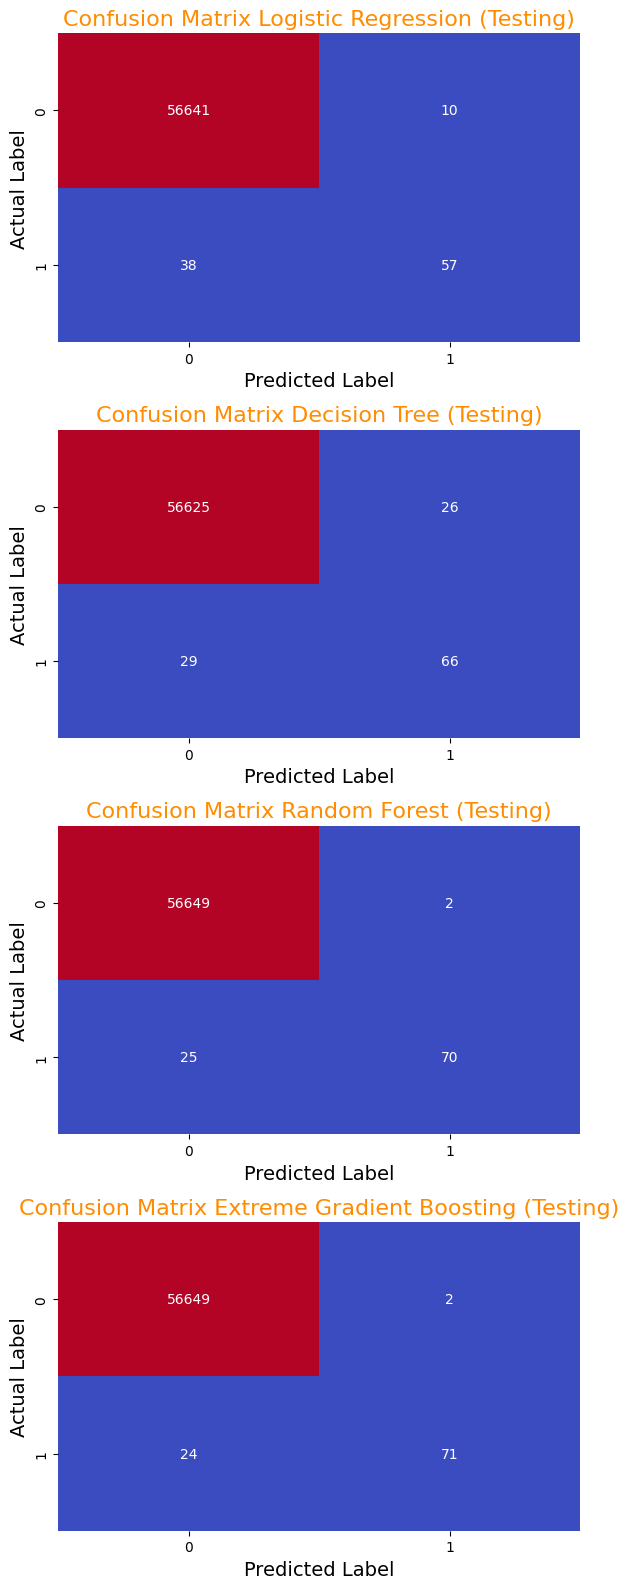

In [37]:
fig,ax=plt.subplots(4,1,figsize=(6,4*4))
sns.heatmap(confusion_matrix(y_test,LR.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[0],cbar=False)
ax[0].set_title("Confusion Matrix Logistic Regression (Testing)",color="darkorange",fontsize=16)
ax[0].set_xlabel("Predicted Label",fontsize=14)
ax[0].set_ylabel("Actual Label",fontsize=14)

sns.heatmap(confusion_matrix(y_test,DT.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[1],cbar=False)
ax[1].set_title("Confusion Matrix Decision Tree (Testing)",color="darkorange",fontsize=16)
ax[1].set_xlabel("Predicted Label",fontsize=14)
ax[1].set_ylabel("Actual Label",fontsize=14)

sns.heatmap(confusion_matrix(y_test,RF.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[2],cbar=False)
ax[2].set_title("Confusion Matrix Random Forest (Testing)",color="darkorange",fontsize=16)
ax[2].set_xlabel("Predicted Label",fontsize=14)
ax[2].set_ylabel("Actual Label",fontsize=14)

sns.heatmap(confusion_matrix(y_test,XGB.predict(x_test)),annot=True,cmap="coolwarm",fmt="g",ax=ax[3],cbar=False)
ax[3].set_title("Confusion Matrix Extreme Gradient Boosting (Testing)",color="darkorange",fontsize=16)
ax[3].set_xlabel("Predicted Label",fontsize=14)
ax[3].set_ylabel("Actual Label",fontsize=14)

plt.tight_layout()
plt.show()

Based on the results in the testing data, it can be determined that the XGBoost classification algorithm has the best results based on various performance measures, such as Precision, Recall, F1-Score, Accuracy scores of 98%, 91%, 95%, 99.96% respectively which concludes the biased nature of the algorithm when performing validation, which indicates the unbalanced nature of the data. Thus, the data balancing technique was chosen to be applied to the algorithm that produced the best results, no matter the bias, i.e. XGBoost Classification algorithm.

### AUPRC Evaluation Metric

Average Precision Score (Logistic Regression): 0.69164
Average Precision Score (Decision Tree): 0.49891
Average Precision Score (Random Forest): 0.79356
Average Precision Score (XGBoost): 0.82698


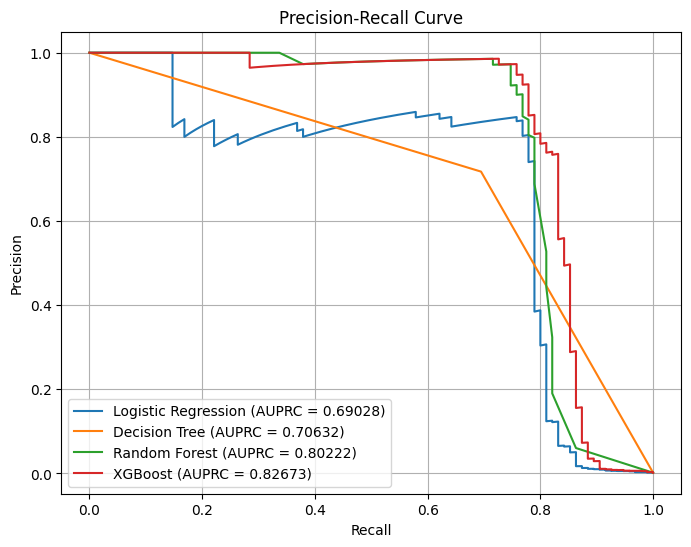

In [38]:
def plot_pr_curve(model, x_test, y_test, model_name):
    probs = model.predict_proba(x_test)[:, 1]
    
    ap=average_precision_score(y_test, probs)
    print(f"Average Precision Score ({model_name}): {ap:.5f}")
    
    precision, recall, _ = precision_recall_curve(y_test, probs)

    auprc = auc(recall, precision)

    plt.plot(recall, precision, label=f'{model_name} (AUPRC = {auprc:.5f})')


plt.figure(figsize=(8, 6))
plot_pr_curve(LR, x_test, y_test, 'Logistic Regression')
plot_pr_curve(DT, x_test, y_test, 'Decision Tree')
plot_pr_curve(RF, x_test, y_test, 'Random Forest')
plot_pr_curve(XGB, x_test, y_test, 'XGBoost')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

## Undersampling Methods for Imbalanced Data

In [39]:
List_x_y=[]

In [40]:
x.shape,y.shape

((283726, 29), (283726,))

In [41]:
y.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [42]:
x_train.shape,y_train.shape

((226980, 29), (226980,))

In [43]:
y_train.value_counts()

Class
0    226602
1       378
Name: count, dtype: int64

### Condensed Nearest Neighbour (CNN)

In [44]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(sampling_strategy="auto", random_state = 42, n_neighbors=1, n_jobs = -1)
x_train_cnn,y_train_cnn = cnn.fit_resample(x_train,y_train)

List_x_y.append(("CNN",x_train_cnn,y_train_cnn,x_test,y_test))
print(x_train_cnn.shape,y_train_cnn.shape)
y_train_cnn.value_counts()

((1262, 29), (1262,))

Class
0    884
1    378
Name: count, dtype: int64

### Neighbourhood Cleaning Rule (NCR)

In [46]:
from imblearn.under_sampling import NeighbourhoodCleaningRule,EditedNearestNeighbours

ncr = NeighbourhoodCleaningRule(sampling_strategy="auto",n_neighbors=3,threshold_cleaning=0.5,n_jobs=-1)
x_train_ncr,y_train_ncr = ncr.fit_resample(x_train,y_train)

List_x_y.append(("NCR",x_train_ncr,y_train_ncr,x_test,y_test))
print(x_train_ncr.shape,y_train_ncr.shape)
y_train_ncr.value_counts()

((226770, 29), (226770,))

Class
0    226392
1       378
Name: count, dtype: int64

### Random Undersampling

In [48]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(sampling_strategy="auto",random_state=42)
x_train_rus,y_train_rus=rus.fit_resample(x_train,y_train)

List_x_y.append(("RUS",x_train_rus,y_train_rus,x_test,y_test))
print(x_train_rus.shape,y_train_rus.shape)
y_train_rus.value_counts()

((756, 29), (756,))

Class
0    378
1    378
Name: count, dtype: int64

## Oversampling Methods for Imbalanced Data

### Synthetic Minority Oversampling Technique (SMOTE)

In [50]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy="auto",random_state=42)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

List_x_y.append(("SMOTE",x_train_smote,y_train_smote,x_test,y_test))
print(x_train_smote.shape,y_train_smote.shape)
y_train_smote.value_counts()

((453204, 29), (453204,))

Class
0    226602
1    226602
Name: count, dtype: int64

### Adaptive Synthetic Sampling (ADASYN)

In [52]:
from imblearn.over_sampling import ADASYN

adasyn=ADASYN(sampling_strategy="auto",random_state=42)
x_train_adasyn,y_train_adasyn=adasyn.fit_resample(x_train,y_train)

List_x_y.append(("ADASYN",x_train_adasyn,y_train_adasyn,x_test,y_test))
print(x_train_adasyn.shape,y_train_adasyn.shape)
y_train_adasyn.value_counts()

((453241, 29), (453241,))

Class
1    226639
0    226602
Name: count, dtype: int64

### Random Oversampling

In [54]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler(sampling_strategy="auto",random_state=42)
x_train_ros,y_train_ros=ros.fit_resample(x_train,y_train)

List_x_y.append(("ROS",x_train_ros,y_train_ros,x_test,y_test))
print(x_train_ros.shape,y_train_ros.shape)
y_train_ros.value_counts()

((453204, 29), (453204,))

Class
0    226602
1    226602
Name: count, dtype: int64

## Oversampling + Undersampling Methods for Imbalanced Data

### SMOTE + NCR

In [56]:
smote=SMOTE(sampling_strategy="auto",random_state=42)
ncr=NeighbourhoodCleaningRule(sampling_strategy="all",n_neighbors=3,threshold_cleaning=0.5,n_jobs=-1)

x_train_sm,y_train_sm=smote.fit_resample(x_train,y_train)
print(x_train_sm.shape,y_train_sm.shape)
print(x_train_sm.head())
print(y_train_sm.head())
print(y_train_sm.value_counts())

x_train_smote_ncr,y_train_smote_ncr=ncr.fit_resample(x_train_sm,y_train_sm)
List_x_y.append(("SMOTE+NCR",x_train_smote_ncr,y_train_smote_ncr,x_test,y_test))
print(x_train_smote_ncr.head())
print(y_train_smote_ncr.head())
print(x_train_smote_ncr.shape,y_train_smote_ncr.shape)
print(y_train_smote_ncr.value_counts())

(453204, 29) (453204,)
         V1        V2        V3        V4        V5        V6        V7  \
0  2.238954 -1.724499 -2.151484 -2.577803  0.993668  3.565492 -1.785957   
1 -1.315062  1.630783  0.597001 -0.038359 -0.404580 -0.965712  0.212249   
2  1.908801  0.021184 -2.087997  0.129310  1.161468  0.605244 -0.022371   
3  1.811257  0.316556  0.316751  3.880231  0.048454  1.020163 -0.734868   
4  1.358817 -1.120881  0.550266 -1.547659 -1.194950  0.275448 -1.201843   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.860122 -1.264003  1.567867  ... -0.323810 -0.149574 -0.049333  0.278442   
1  0.735381 -1.267926 -0.482635  ... -0.067580 -0.238898 -0.946773  0.323904   
2  0.180296  0.283819 -0.497766  ... -0.210474  0.293609  1.095842 -0.044874   
3  0.233651  0.681423  1.146705  ... -0.228032  0.138869  0.700422  0.174064   
4  0.212889 -2.094285  1.492821  ... -0.361686 -0.340972 -0.636442  0.252758   

        V24       V25       V26       V27    

         V1        V2        V3        V4        V5        V6        V7  \
0  2.238954 -1.724499 -2.151484 -2.577803  0.993668  3.565492 -1.785957   
1 -1.315062  1.630783  0.597001 -0.038359 -0.404580 -0.965712  0.212249   
2  1.908801  0.021184 -2.087997  0.129310  1.161468  0.605244 -0.022371   
3  1.811257  0.316556  0.316751  3.880231  0.048454  1.020163 -0.734868   
4  1.358817 -1.120881  0.550266 -1.547659 -1.194950  0.275448 -1.201843   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.860122 -1.264003  1.567867  ... -0.323810 -0.149574 -0.049333  0.278442   
1  0.735381 -1.267926 -0.482635  ... -0.067580 -0.238898 -0.946773  0.323904   
2  0.180296  0.283819 -0.497766  ... -0.210474  0.293609  1.095842 -0.044874   
3  0.233651  0.681423  1.146705  ... -0.228032  0.138869  0.700422  0.174064   
4  0.212889 -2.094285  1.492821  ... -0.361686 -0.340972 -0.636442  0.252758   

        V24       V25       V26       V27       V28    Amount  
0  0

### ADASYN + NCR

In [58]:
adasyn=ADASYN(sampling_strategy="auto",random_state=42)
ncr = NeighbourhoodCleaningRule(sampling_strategy="all",n_neighbors=3,threshold_cleaning=0.5,n_jobs=-1)

x_train_ad,y_train_ad=adasyn.fit_resample(x_train,y_train)
print(x_train_ad.shape,y_train_ad.shape)
print(x_train_ad.head())
print(y_train_ad.head())
print(y_train_ad.value_counts())

x_train_adasyn_ncr,y_train_adasyn_ncr=ncr.fit_resample(x_train_ad,y_train_ad)
List_x_y.append(("ADASYN+NCR",x_train_adasyn_ncr,y_train_adasyn_ncr,x_test,y_test))
print(x_train_adasyn_ncr.head())
print(y_train_adasyn_ncr.head())
print(x_train_adasyn_ncr.shape,y_train_adasyn_ncr.shape)
print(y_train_adasyn_ncr.value_counts())

(453241, 29) (453241,)
         V1        V2        V3        V4        V5        V6        V7  \
0  2.238954 -1.724499 -2.151484 -2.577803  0.993668  3.565492 -1.785957   
1 -1.315062  1.630783  0.597001 -0.038359 -0.404580 -0.965712  0.212249   
2  1.908801  0.021184 -2.087997  0.129310  1.161468  0.605244 -0.022371   
3  1.811257  0.316556  0.316751  3.880231  0.048454  1.020163 -0.734868   
4  1.358817 -1.120881  0.550266 -1.547659 -1.194950  0.275448 -1.201843   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.860122 -1.264003  1.567867  ... -0.323810 -0.149574 -0.049333  0.278442   
1  0.735381 -1.267926 -0.482635  ... -0.067580 -0.238898 -0.946773  0.323904   
2  0.180296  0.283819 -0.497766  ... -0.210474  0.293609  1.095842 -0.044874   
3  0.233651  0.681423  1.146705  ... -0.228032  0.138869  0.700422  0.174064   
4  0.212889 -2.094285  1.492821  ... -0.361686 -0.340972 -0.636442  0.252758   

        V24       V25       V26       V27    

         V1        V2        V3        V4        V5        V6        V7  \
0  2.238954 -1.724499 -2.151484 -2.577803  0.993668  3.565492 -1.785957   
1 -1.315062  1.630783  0.597001 -0.038359 -0.404580 -0.965712  0.212249   
2  1.908801  0.021184 -2.087997  0.129310  1.161468  0.605244 -0.022371   
3  1.811257  0.316556  0.316751  3.880231  0.048454  1.020163 -0.734868   
4  1.358817 -1.120881  0.550266 -1.547659 -1.194950  0.275448 -1.201843   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.860122 -1.264003  1.567867  ... -0.323810 -0.149574 -0.049333  0.278442   
1  0.735381 -1.267926 -0.482635  ... -0.067580 -0.238898 -0.946773  0.323904   
2  0.180296  0.283819 -0.497766  ... -0.210474  0.293609  1.095842 -0.044874   
3  0.233651  0.681423  1.146705  ... -0.228032  0.138869  0.700422  0.174064   
4  0.212889 -2.094285  1.492821  ... -0.361686 -0.340972 -0.636442  0.252758   

        V24       V25       V26       V27       V28    Amount  
0  0

## Classification Report XGBoost in Data Validation with Resampling Method

In [60]:
# XGB=XGBClassifier()
# print("--- Validation Dataset ---")
# print("-- Extreme Gradient Boosting --\n")
# for name,x,y in List_x_y:
#     print("Model fitting...")
#     XGB.fit(x,y)
#     print(f"Model fitted - {name}!\n")

#     cr=classification_report(y_val,XGB.predict(x_val))
#     print(f"Classification Report:\n{cr}")
#     print(f"Accuracy Score: {accuracy_score(y_val,XGB.predict(x_val))}\n\n\n")

## Classification Report & Confusion Matrix XGBoost in Data Testing with Resampling Method

--- Testing Dataset ---
-- Extreme Gradient Boosting --

Model fitting...
Model fitted - CNN!

Classification Report:
              precision    recall  f1-score   support

           0    0.99959   0.99968   0.99964     56651
           1    0.80000   0.75789   0.77838        95

    accuracy                        0.99928     56746
   macro avg    0.89980   0.87879   0.88901     56746
weighted avg    0.99926   0.99928   0.99927     56746

Accuracy Score: 0.9992774821132767


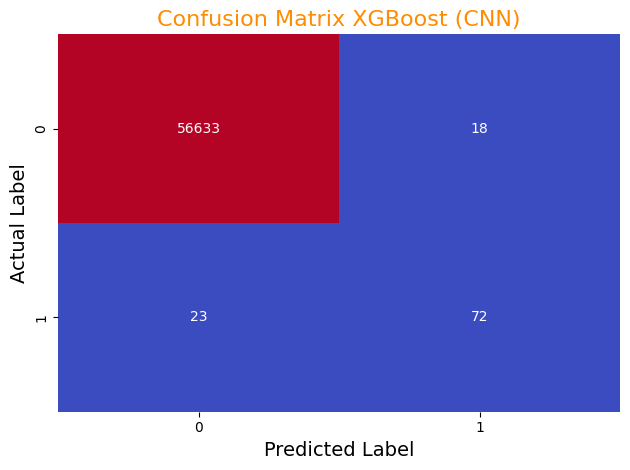

Model fitting...
Model fitted - NCR!

Classification Report:
              precision    recall  f1-score   support

           0    0.99954   0.99993   0.99974     56651
           1    0.94521   0.72632   0.82143        95

    accuracy                        0.99947     56746
   macro avg    0.97237   0.86312   0.91058     56746
weighted avg    0.99945   0.99947   0.99944     56746

Accuracy Score: 0.9994713283755683


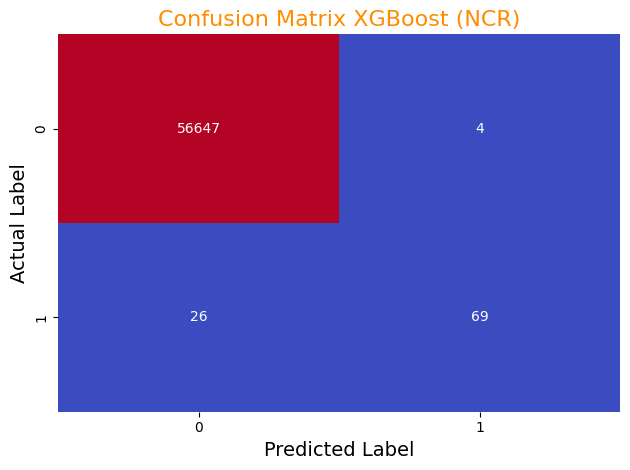

Model fitting...
Model fitted - RUS!

Classification Report:
              precision    recall  f1-score   support

           0    0.99976   0.97306   0.98623     56651
           1    0.05100   0.86316   0.09630        95

    accuracy                        0.97288     56746
   macro avg    0.52538   0.91811   0.54127     56746
weighted avg    0.99818   0.97288   0.98474     56746

Accuracy Score: 0.9728791456666549


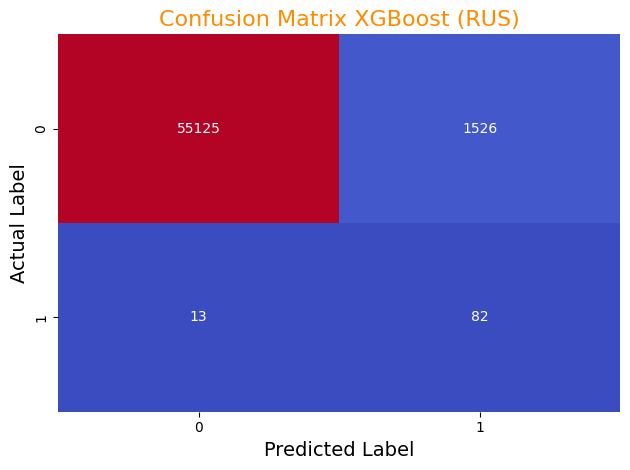

Model fitting...
Model fitted - SMOTE!

Classification Report:
              precision    recall  f1-score   support

           0    0.99966   0.99944   0.99955     56651
           1    0.70370   0.80000   0.74877        95

    accuracy                        0.99910     56746
   macro avg    0.85168   0.89972   0.87416     56746
weighted avg    0.99917   0.99910   0.99913     56746

Accuracy Score: 0.9991012582384662


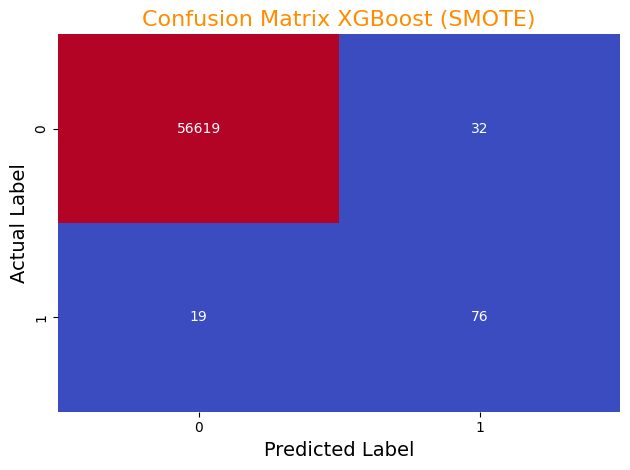

Model fitting...
Model fitted - ADASYN!

Classification Report:
              precision    recall  f1-score   support

           0    0.99965   0.99944   0.99954     56651
           1    0.70093   0.78947   0.74257        95

    accuracy                        0.99908     56746
   macro avg    0.85029   0.89445   0.87106     56746
weighted avg    0.99915   0.99908   0.99911     56746

Accuracy Score: 0.9990836358509851


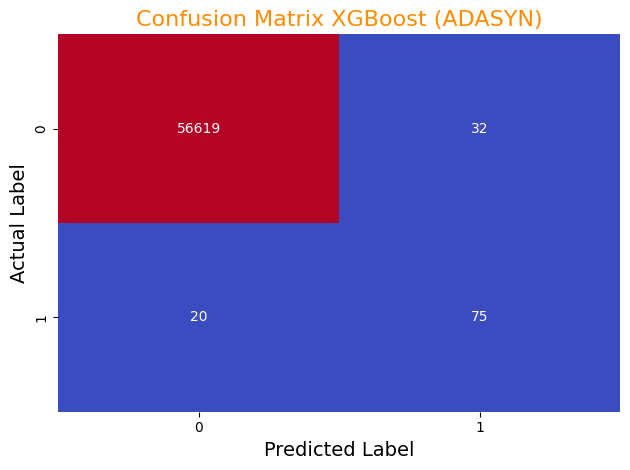

Model fitting...
Model fitted - ROS!

Classification Report:
              precision    recall  f1-score   support

           0    0.99961   0.99993   0.99977     56651
           1    0.94805   0.76842   0.84884        95

    accuracy                        0.99954     56746
   macro avg    0.97383   0.88418   0.92430     56746
weighted avg    0.99953   0.99954   0.99952     56746

Accuracy Score: 0.9995418179254926


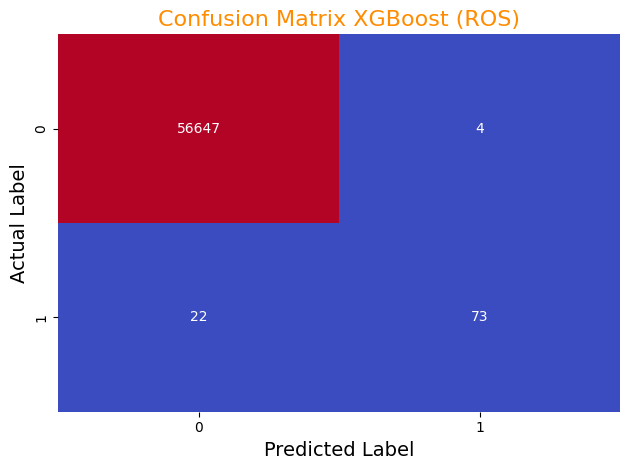

Model fitting...
Model fitted - SMOTE+NCR!

Classification Report:
              precision    recall  f1-score   support

           0    0.99966   0.99944   0.99955     56651
           1    0.70370   0.80000   0.74877        95

    accuracy                        0.99910     56746
   macro avg    0.85168   0.89972   0.87416     56746
weighted avg    0.99917   0.99910   0.99913     56746

Accuracy Score: 0.9991012582384662


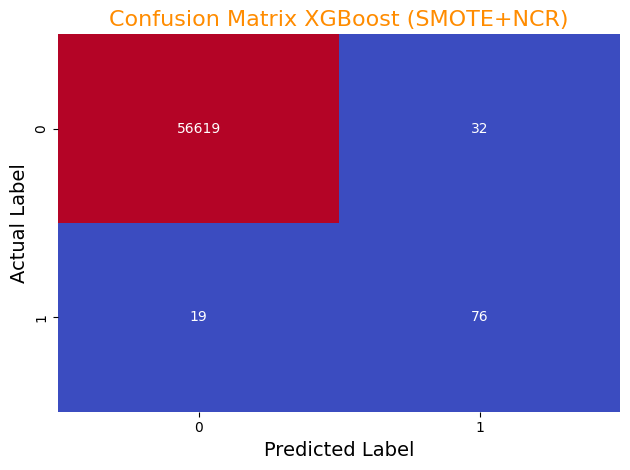

Model fitting...
Model fitted - ADASYN+NCR!

Classification Report:
              precision    recall  f1-score   support

           0    0.99966   0.99931   0.99949     56651
           1    0.66087   0.80000   0.72381        95

    accuracy                        0.99898     56746
   macro avg    0.83027   0.89966   0.86165     56746
weighted avg    0.99910   0.99898   0.99903     56746

Accuracy Score: 0.9989779015260988


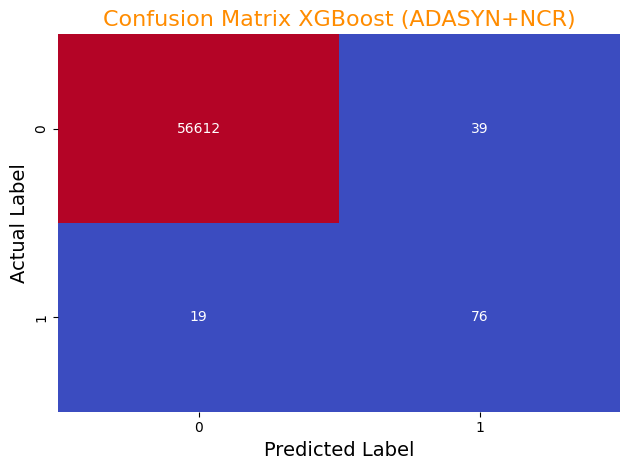

In [61]:
print("--- Testing Dataset ---")
print("-- Extreme Gradient Boosting --\n")
for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
    print("Model fitting...")
    XGB.fit(x_tr,y_tr)
    print(f"Model fitted - {name}!\n")
    
    y_preds=XGB.predict(x_ts)
    
    cr=classification_report(y_ts,y_preds,digits=5)
    
    print(f"Classification Report:\n{cr}")
    print(f"Accuracy Score: {accuracy_score(y_ts,y_preds)}")
    
    cm=confusion_matrix(y_ts,y_preds)
    
    sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g",cbar=False)
    plt.title(f"Confusion Matrix XGBoost ({name})",color="darkorange",fontsize=16)
    plt.xlabel("Predicted Label",fontsize=14)
    plt.ylabel("Actual Label",fontsize=14)
    plt.tight_layout()
    plt.show()

## Classification Report & Confusion Matrix Random Forest in Data Testing with Resampling Method

--- Testing Dataset ---
-- Random Forest --

Model fitting...
Model fitted - CNN!

Classification Report:
              precision    recall  f1-score   support

           0    0.99958   0.99951   0.99954     56651
           1    0.71717   0.74737   0.73196        95

    accuracy                        0.99908     56746
   macro avg    0.85837   0.87344   0.86575     56746
weighted avg    0.99910   0.99908   0.99909     56746

Accuracy Score: 0.9990836358509851


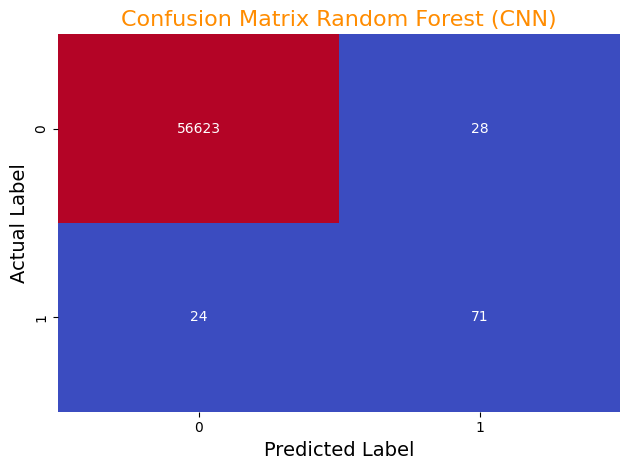

Model fitting...
Model fitted - NCR!

Classification Report:
              precision    recall  f1-score   support

           0    0.99958   0.99991   0.99974     56651
           1    0.93421   0.74737   0.83041        95

    accuracy                        0.99949     56746
   macro avg    0.96689   0.87364   0.91508     56746
weighted avg    0.99947   0.99949   0.99946     56746

Accuracy Score: 0.9994889507630493


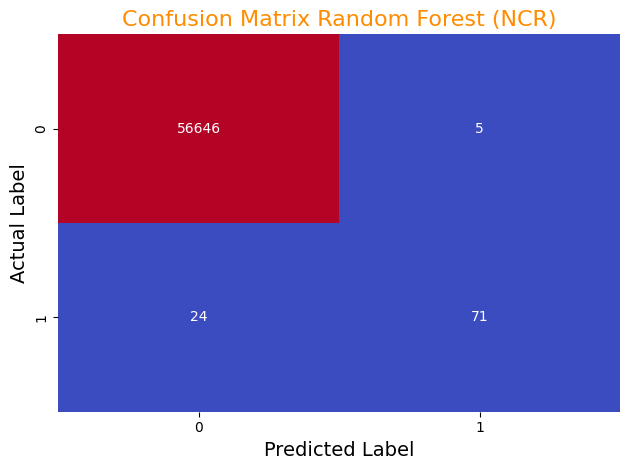

Model fitting...
Model fitted - RUS!

Classification Report:
              precision    recall  f1-score   support

           0    0.99977   0.98316   0.99139     56651
           1    0.07915   0.86316   0.14500        95

    accuracy                        0.98296     56746
   macro avg    0.53946   0.92316   0.56820     56746
weighted avg    0.99823   0.98296   0.98998     56746

Accuracy Score: 0.9829591513058189


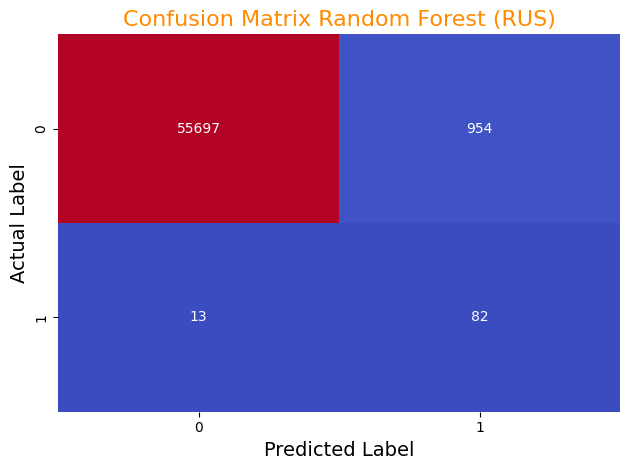

Model fitting...
Model fitted - SMOTE!

Classification Report:
              precision    recall  f1-score   support

           0    0.99959   0.99988   0.99974     56651
           1    0.91139   0.75789   0.82759        95

    accuracy                        0.99947     56746
   macro avg    0.95549   0.87889   0.91366     56746
weighted avg    0.99945   0.99947   0.99945     56746

Accuracy Score: 0.9994713283755683


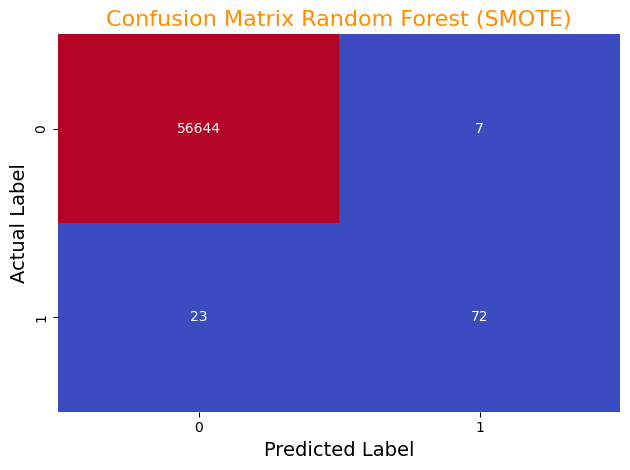

Model fitting...
Model fitted - ADASYN!

Classification Report:
              precision    recall  f1-score   support

           0    0.99956   0.99986   0.99971     56651
           1    0.89744   0.73684   0.80925        95

    accuracy                        0.99942     56746
   macro avg    0.94850   0.86835   0.90448     56746
weighted avg    0.99939   0.99942   0.99939     56746

Accuracy Score: 0.9994184612131252


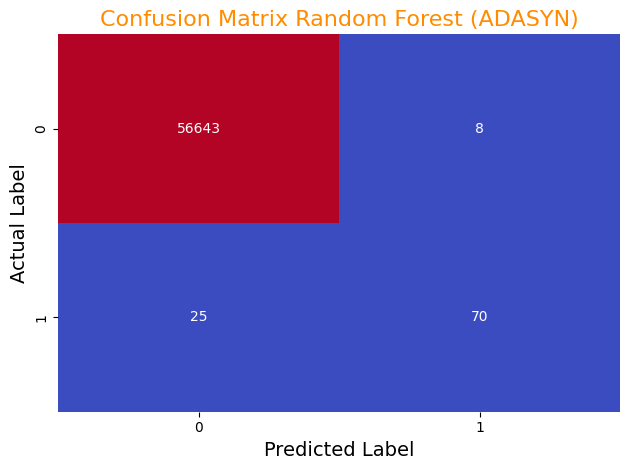

Model fitting...
Model fitted - ROS!

Classification Report:
              precision    recall  f1-score   support

           0    0.99954   0.99996   0.99975     56651
           1    0.97183   0.72632   0.83133        95

    accuracy                        0.99951     56746
   macro avg    0.98569   0.86314   0.91554     56746
weighted avg    0.99949   0.99951   0.99947     56746

Accuracy Score: 0.9995065731505305


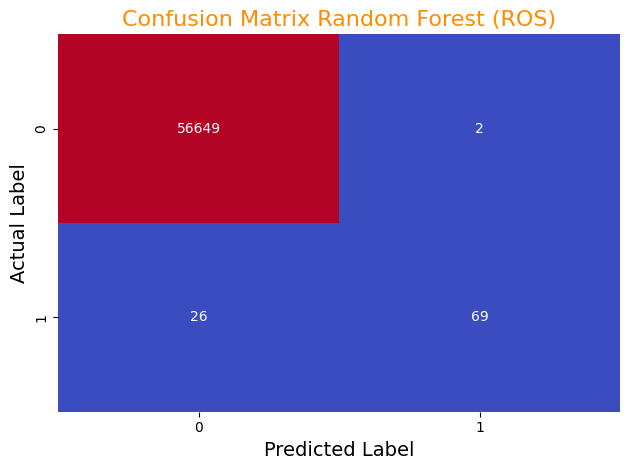

Model fitting...
Model fitted - SMOTE+NCR!

Classification Report:
              precision    recall  f1-score   support

           0    0.99961   0.99981   0.99971     56651
           1    0.86905   0.76842   0.81564        95

    accuracy                        0.99942     56746
   macro avg    0.93433   0.88411   0.90768     56746
weighted avg    0.99939   0.99942   0.99940     56746

Accuracy Score: 0.9994184612131252


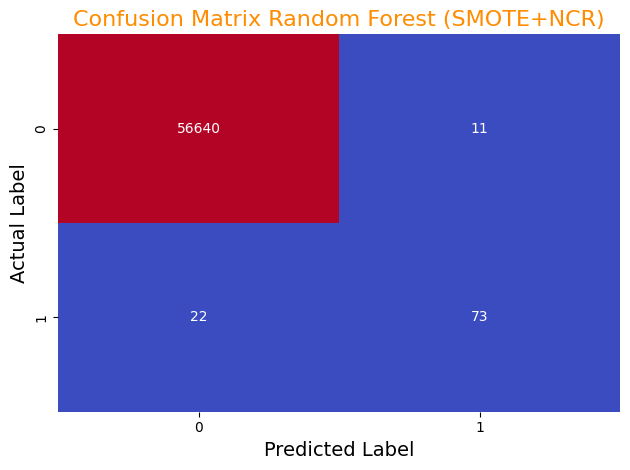

Model fitting...
Model fitted - ADASYN+NCR!

Classification Report:
              precision    recall  f1-score   support

           0    0.99959   0.99979   0.99969     56651
           1    0.85714   0.75789   0.80447        95

    accuracy                        0.99938     56746
   macro avg    0.92837   0.87884   0.90208     56746
weighted avg    0.99936   0.99938   0.99936     56746

Accuracy Score: 0.9993832164381631


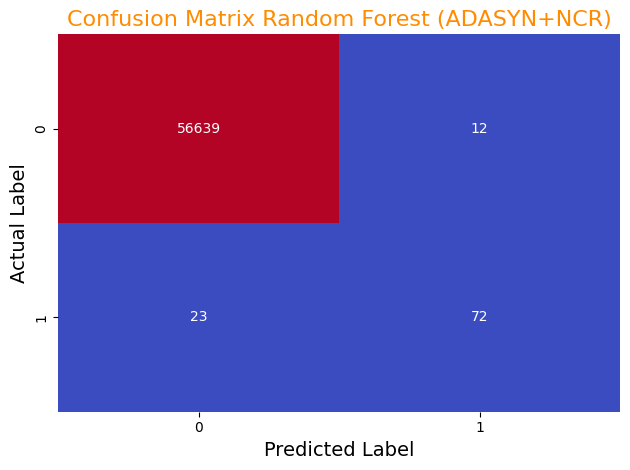

In [62]:
print("--- Testing Dataset ---")
print("-- Random Forest --\n")
for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
    print("Model fitting...")
    RF.fit(x_tr,y_tr)
    print(f"Model fitted - {name}!\n")
    
    y_preds=RF.predict(x_ts)
    
    cr=classification_report(y_ts,y_preds,digits=5)
    
    print(f"Classification Report:\n{cr}")
    print(f"Accuracy Score: {accuracy_score(y_ts,y_preds)}")
    
    cm=confusion_matrix(y_ts,y_preds)
    
    sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g",cbar=False)
    plt.title(f"Confusion Matrix Random Forest ({name})",color="darkorange",fontsize=16)
    plt.xlabel("Predicted Label",fontsize=14)
    plt.ylabel("Actual Label",fontsize=14)
    plt.tight_layout()
    plt.show()

## Confusion Matrix XGBoost in Data Validation with Resampling Method

In [63]:
# print(f"--- Validation Dataset ---")
# print("-- Extreme Gradient Boosting --\n")
# for name,x,y in List_x_y:
#     XGB.fit(x,y)
#     cm=confusion_matrix(y_val,XGB.predict(x_val))
#     sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g")
#     plt.title(f"Confusion Matrix ({name})",color="darkorange",fontsize=16)
#     plt.xlabel("Predicted Label",fontsize=14)
#     plt.ylabel("Actual Label",fontsize=14)
#     plt.tight_layout()
#     plt.show()

## Confusion Matrix XGBoost in Data Testing with Resampling Method

In [64]:
# print(f"--- Testing Dataset ---")
# print("-- Extreme Gradient Boosting --\n")
# for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
#     XGB.fit(x_tr,y_tr)
    
#     y_preds=XGB.predict(x_ts)
    
#     cm=confusion_matrix(y_ts,y_preds)
    
#     sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g",cbar=False)
#     plt.title(f"Confusion Matrix XGBoost ({name})",color="darkorange",fontsize=16)
#     plt.xlabel("Predicted Label",fontsize=14)
#     plt.ylabel("Actual Label",fontsize=14)
#     plt.tight_layout()
#     plt.show()

## Confusion Matrix Random Forest in Data Testing with Resampling Method

In [65]:
# print(f"--- Testing Dataset ---")
# print("-- Random Forest --\n")
# for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
#     RF.fit(x_tr,y_tr)
    
#     y_preds=RF.predict(x_ts)
    
#     cm=confusion_matrix(y_ts,y_preds)
    
#     sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g",cbar=False)
#     plt.title(f"Confusion Matrix Random Forest ({name})",color="darkorange",fontsize=16)
#     plt.xlabel("Predicted Label",fontsize=14)
#     plt.ylabel("Actual Label",fontsize=14)
#     plt.tight_layout()
#     plt.show()

## AUPRC with Resampling Method

Average Precision Score (CNN): 0.60672
Average Precision Score (NCR): 0.68698
Average Precision Score (RUS): 0.04425
Average Precision Score (SMOTE): 0.56330
Average Precision Score (ADASYN): 0.55372
Average Precision Score (ROS): 0.72889
Average Precision Score (SMOTE+NCR): 0.56330
Average Precision Score (ADASYN+NCR): 0.52903


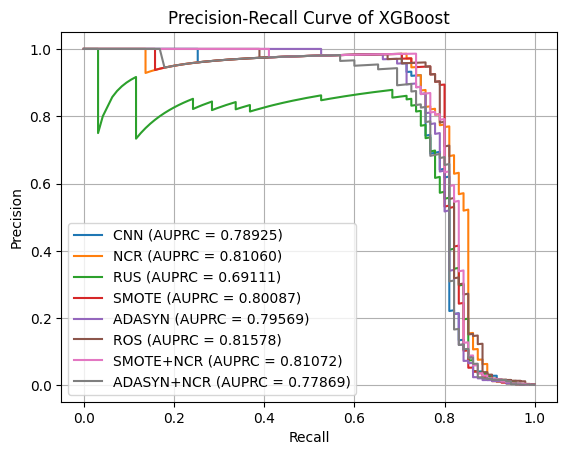

In [66]:
for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
    XGB.fit(x_tr,y_tr)
    
    y_preds=XGB.predict(x_ts)
    
    ap=average_precision_score(y_ts,y_preds)
    print(f"Average Precision Score ({name}): {ap:.5f}")
    
    precision, recall, _ = precision_recall_curve(y_ts, XGB.predict_proba(x_ts)[:, 1])
    
    auprc = auc(recall, precision)
    
    plt.plot(recall, precision, label=f'{name} (AUPRC = {auprc:.5f})')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of XGBoost')
plt.legend()
plt.grid(True)
plt.show()

Average Precision Score (CNN): 0.53641
Average Precision Score (NCR): 0.69862
Average Precision Score (RUS): 0.06855
Average Precision Score (SMOTE): 0.69114
Average Precision Score (ADASYN): 0.66171
Average Precision Score (ROS): 0.70631
Average Precision Score (SMOTE+NCR): 0.66818
Average Precision Score (ADASYN+NCR): 0.65003


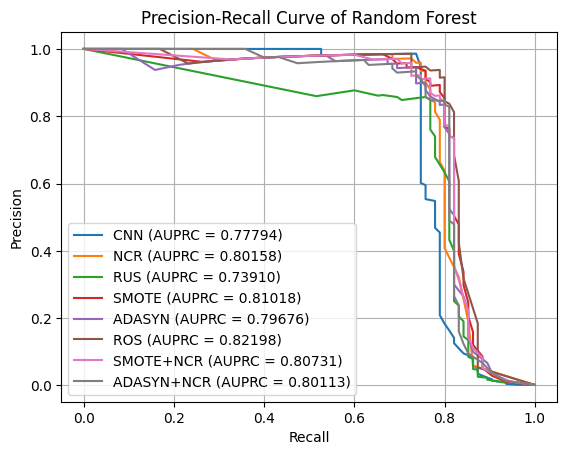

In [67]:
for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
    RF.fit(x_tr,y_tr)
    
    y_preds=RF.predict(x_ts)
    
    ap=average_precision_score(y_ts,y_preds)
    print(f"Average Precision Score ({name}): {ap:.5f}")
    
    precision, recall, _ = precision_recall_curve(y_ts, RF.predict_proba(x_ts)[:, 1])
    
    auprc = auc(recall, precision)
    
    plt.plot(recall, precision, label=f'{name} (AUPRC = {auprc:.5f})')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of Random Forest')
plt.legend()
plt.grid(True)
plt.show()

## Comparison of All Resampling Method Using F1-Score

--- Testing Dataset ---
-- Extreme Gradient Boosting --

Model fitting...
Model fitted - CNN!

Model fitting...
Model fitted - NCR!

Model fitting...
Model fitted - RUS!

Model fitting...
Model fitted - SMOTE!

Model fitting...
Model fitted - ADASYN!

Model fitting...
Model fitted - ROS!

Model fitting...
Model fitted - SMOTE+NCR!

Model fitting...
Model fitted - ADASYN+NCR!



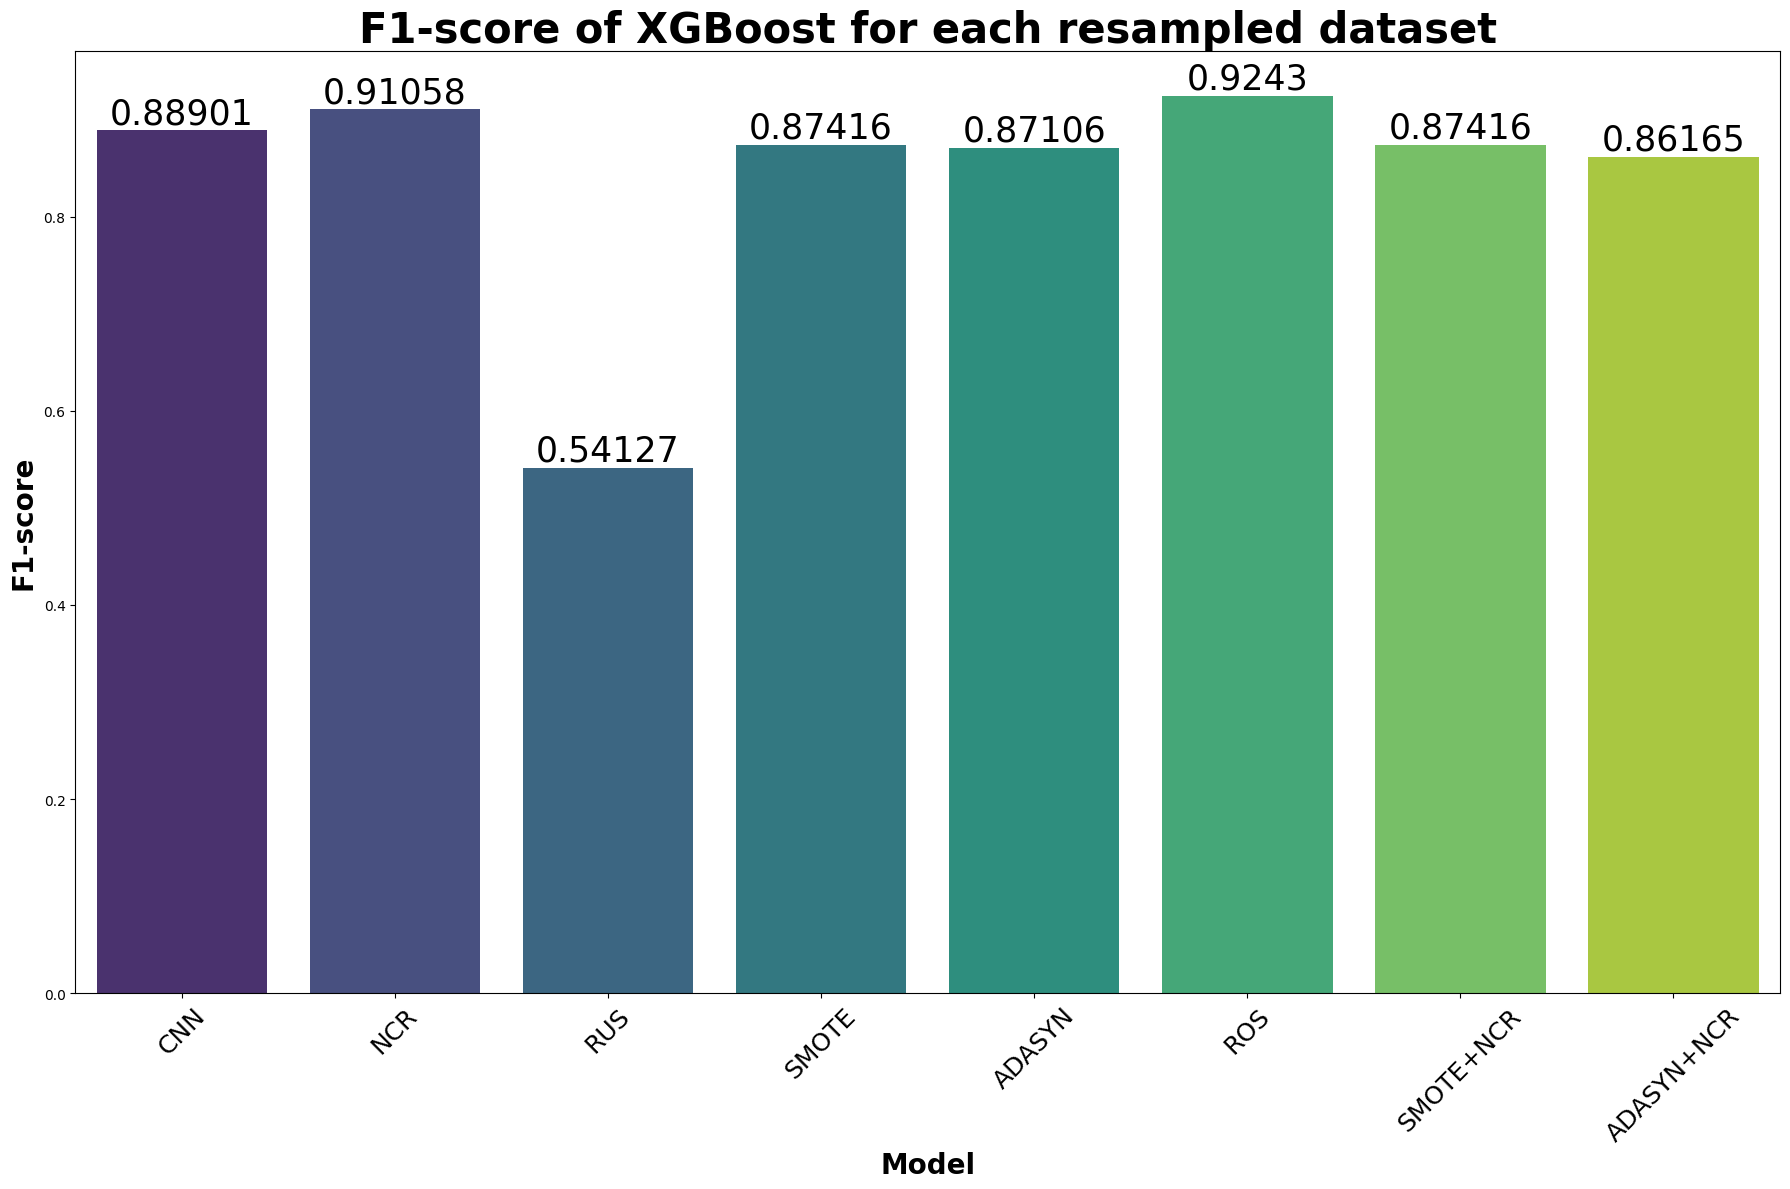

In [68]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

f1_scores = []

print("--- Testing Dataset ---")
print("-- Extreme Gradient Boosting --\n")

for name, x_tr, y_tr, x_ts,y_ts in List_x_y:
    print("Model fitting...")
    XGB.fit(x_tr, y_tr)
    print(f"Model fitted - {name}!\n")

    y_preds=XGB.predict(x_ts)

    # cr = classification_report(y_ts, y_preds,digits=5)
    f1_scores.append(f1_score(y_ts,y_preds,average="macro"))
    # _, _, f1, _ = precision_recall_fscore_support(y_ts, y_preds)
    # f1_scores.append(f1)
        
plt.figure(figsize=(18, 12))
sns.barplot(x=[name for name, _, _, _, _ in List_x_y], y=f1_scores, palette='viridis',hue=[name for name, _, _, _, _ in List_x_y])

plt.xlabel('Model', fontsize=20, fontweight='bold')
plt.ylabel('F1-score', fontsize=20, fontweight='bold')
plt.title('F1-score of XGBoost for each resampled dataset', fontsize=30, fontweight='bold')
plt.xticks(range(len(List_x_y)), [name for name, _, _, _, _ in List_x_y], fontsize=18,rotation=45)

for index, value in enumerate(f1_scores):
    plt.text(index, value, str(round(value, 5)), ha='center', va='bottom', fontsize=25)

plt.tight_layout()
plt.show()


--- Testing Dataset ---
-- Random Forest --

Model fitting...
Model fitted - CNN!

Model fitting...
Model fitted - NCR!

Model fitting...
Model fitted - RUS!

Model fitting...
Model fitted - SMOTE!

Model fitting...
Model fitted - ADASYN!

Model fitting...
Model fitted - ROS!

Model fitting...
Model fitted - SMOTE+NCR!

Model fitting...
Model fitted - ADASYN+NCR!



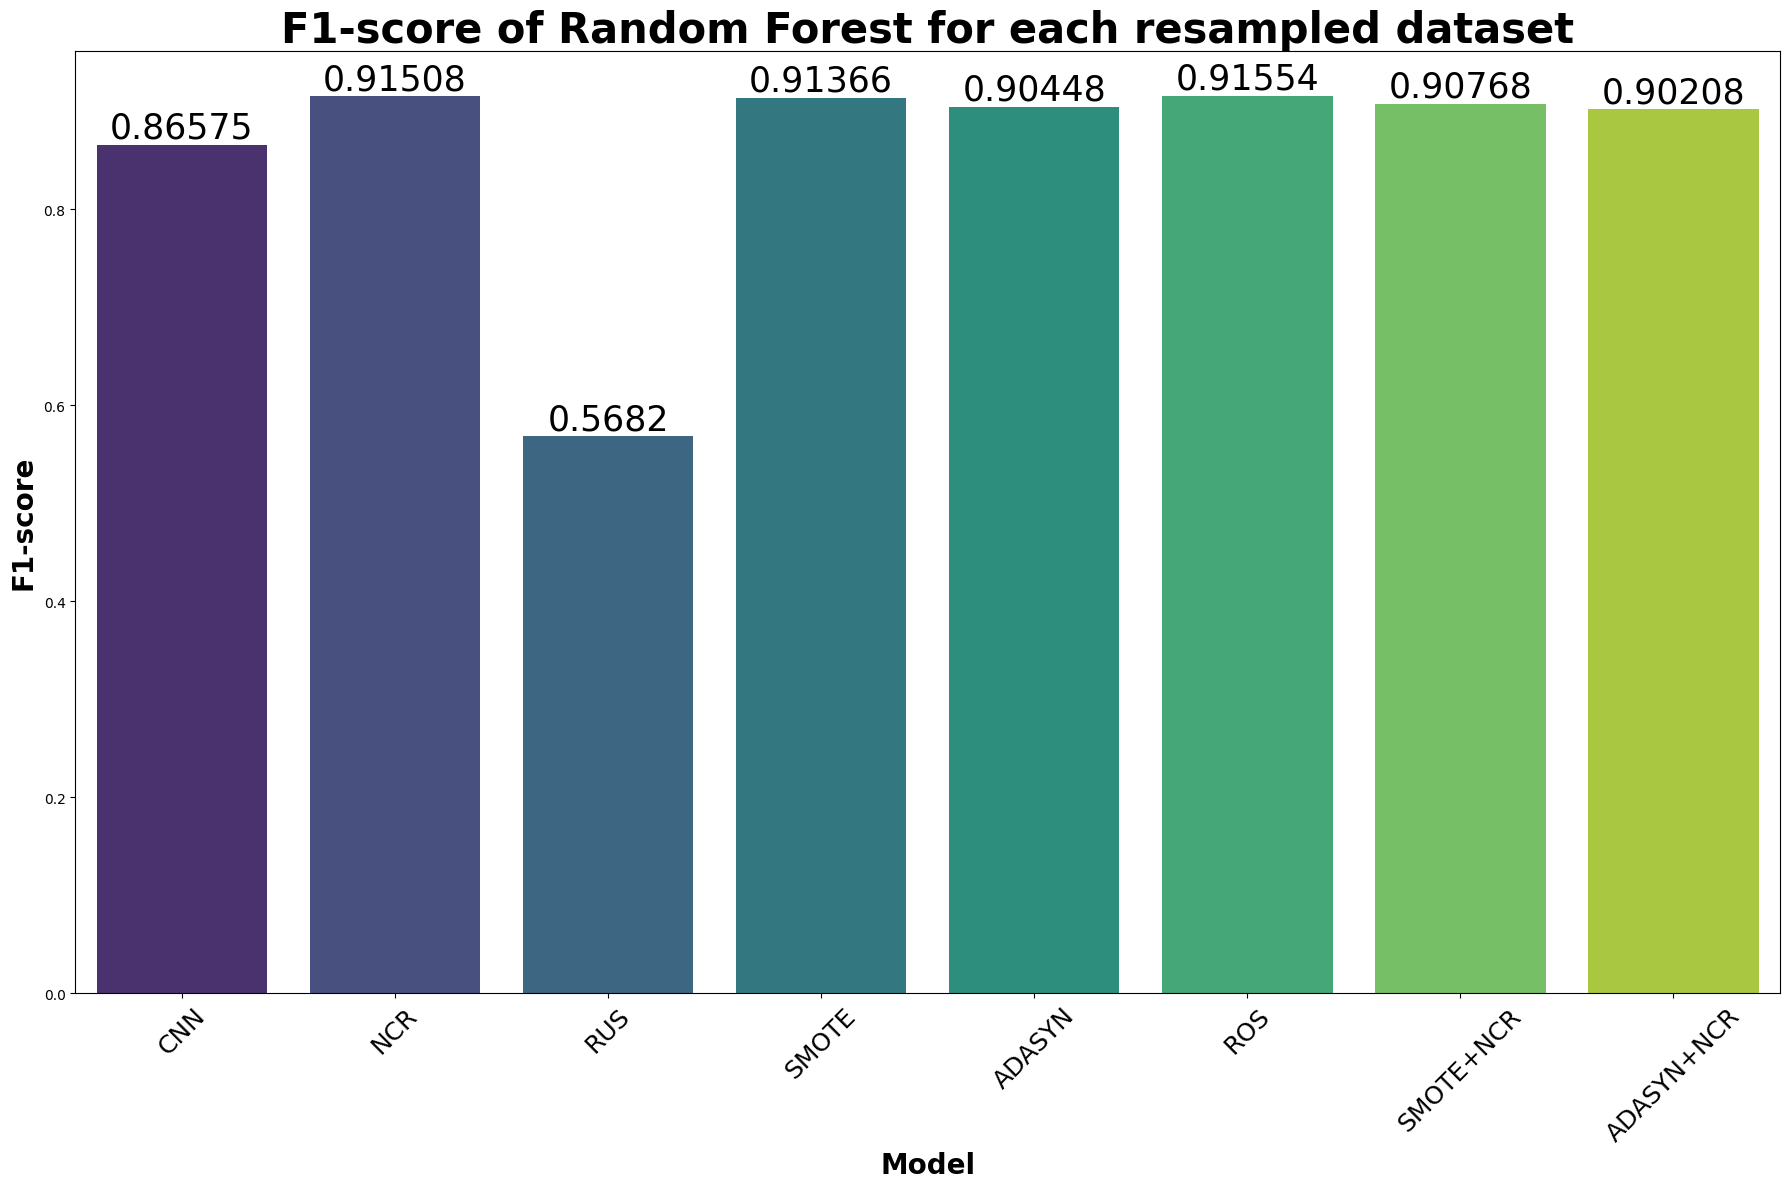

In [69]:
from sklearn.metrics import precision_recall_fscore_support

f1_scores = []

print("--- Testing Dataset ---")
print("-- Random Forest --\n")

for name, x_tr, y_tr, x_ts,y_ts in List_x_y:
    print("Model fitting...")
    RF.fit(x_tr, y_tr)
    print(f"Model fitted - {name}!\n")

    y_preds=RF.predict(x_ts)

    # cr = classification_report(y_ts, y_preds,digits=5)
    f1_scores.append(f1_score(y_ts,y_preds,average="macro"))
    f1=round(f1_score(y_ts,y_preds,average="macro"),5)
    # _, _, f1, _ = precision_recall_fscore_support(y_ts, y_preds)
    # f1_scores.append(f1)

# Membuat bar chart
plt.figure(figsize=(18, 12))
sns.barplot(x=[name for name, _, _, _, _ in List_x_y], y=f1_scores, palette='viridis',hue=[name for name, _, _, _, _ in List_x_y])

plt.xlabel('Model', fontsize=20, fontweight='bold')
plt.ylabel('F1-score', fontsize=20, fontweight='bold')
plt.title('F1-score of Random Forest for each resampled dataset', fontsize=30, fontweight='bold')
plt.xticks(range(len(List_x_y)), [name for name, _, _, _, _ in List_x_y], fontsize=18,rotation=45)

for index, value in enumerate(f1_scores):
    plt.text(index, value, str(round(value, 5)), ha='center', va='bottom', fontsize=25)

plt.tight_layout()
plt.show()


In [70]:
# adasyn=ADASYN(sampling_strategy="auto",random_state=42)
# ncr = NeighbourhoodCleaningRule(sampling_strategy="all",n_neighbors=3,threshold_cleaning=0.5,n_jobs=-1)

# x_ad,y_ad=adasyn.fit_resample(x,y)

# print(x_ad.shape,y_ad.shape)
# print(x_ad.head())
# print(y_ad.head())
# print(y_ad.value_counts())

# x_adasyn_ncr,y_adasyn_ncr=ncr.fit_resample(x_ad,y_ad)
# x_train_adasyn_ncr,x_test_adasyn_ncr,y_train_adasyn_ncr,y_test_adasyn_ncr=train_test_split(x_adasyn_ncr,y_adasyn_ncr,test_size=0.2,random_state=42)

# List_x_y.append(("ADASYN+NCR",x_train_adasyn_ncr,y_train_adasyn_ncr,x_test_adasyn_ncr,y_test_adasyn_ncr))

In [71]:
# print(x_adasyn_ncr.head())
# print(y_adasyn_ncr.head())
# print(x_adasyn_ncr.shape,y_adasyn_ncr.shape)
# print(y_adasyn_ncr.value_counts())

In [72]:
# print(x_train_adasyn_ncr.head())
# print(y_train_adasyn_ncr.head())
# print(x_train_adasyn_ncr.shape,y_train_adasyn_ncr.shape)
# print(y_train_adasyn_ncr.value_counts())

In [73]:
for x in List_x_y:
    print(x[0])

CNN
NCR
RUS
SMOTE
ADASYN
ROS
SMOTE+NCR
ADASYN+NCR


In [74]:
x=dataset.drop("Class",axis=1)
y=dataset["Class"]
x.shape,y.shape

((283726, 29), (283726,))

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

x_train.shape,x_test.shape

((226980, 29), (56746, 29))

In [76]:
# from imblearn.under_sampling import NeighbourhoodCleaningRule,EditedNearestNeighbours

# ncr = NeighbourhoodCleaningRule(sampling_strategy="auto",n_neighbors=3,threshold_cleaning=0.9,n_jobs=-1)
# x_ncr,y_ncr = ncr.fit_resample(x,y)
# x_train_ncr,x_test_ncr,y_train_ncr,y_test_ncr=train_test_split(x_ncr,y_ncr,test_size=0.2,random_state=42)

# x_train_ncr.shape,y_train_ncr.shape

In [77]:
# y_ncr.value_counts()

In [78]:
# y_ncr.value_counts()

In [79]:
# y_train_ncr.value_counts()

In [80]:
# RandomForestClassifier()
# XGBClassifier()
# DecisionTreeClassifier()
# LogisticRegression()

## Fine-Tuning Parameter

In [81]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# # Inisialisasi XGBClassifier
# xgb = XGBClassifier()

# # Daftar parameter yang akan diuji
# param_grid = {
#     'n_estimators': [None,100,200,300],
#     'max_depth': [None,3, 5, 7],
#     'learning_rate': [None,0.1, 0.01]
# }

# # Inisialisasi GridSearchCV
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')

# # Melatih model
# grid_search.fit(x_train_smote, y_train_smote)

# # Menampilkan parameter terbaik
# print("Parameter terbaik:", grid_search.best_params_)

# # Menampilkan akurasi terbaik
# print("Akurasi terbaik:", grid_search.best_score_)

In [82]:
# XGBB=XGBClassifier(n_estimators=300,max_depth=7)
# print(XGBB.get_params())

In [83]:
# from sklearn.metrics import precision_recall_fscore_support
# from sklearn.metrics import f1_score
# f1_scores = []

# print("--- Testing Dataset ---")
# print("-- Extreme Gradient Boosting --\n")
# for name, x_tr, y_tr,x_ts,y_ts in List_x_y:
#     print("Model fitting...")
#     XGBB.fit(x_tr, y_tr)
#     print(f"Model fitted - {name}!\n")
    
#     y_preds = XGBB.predict(x_ts)

#     # cr = classification_report(y_ts, y_preds,digits=5)
#     f1_scores.append(f1_score(y_ts,y_preds,average="macro"))
#     # _, _, f1, _ = precision_recall_fscore_support(y_test, XGB.predict(x_test), average='binary')
#     # f1_scores.append(f1)

# plt.figure(figsize=(18, 12))
# sns.barplot(x=[name for name, _, _, _, _ in List_x_y], y=f1_scores, palette='viridis',hue=[name for name, _, _, _, _ in List_x_y])

# plt.xlabel('Model', fontsize=20, fontweight='bold')
# plt.ylabel('F1-score', fontsize=20, fontweight='bold')
# plt.title('F1-score of XGBoost for each resampled dataset', fontsize=30, fontweight='bold')
# plt.xticks(range(len(List_x_y)), [name for name, _, _, _, _ in List_x_y], fontsize=18,rotation=45)

# for index, value in enumerate(f1_scores):
#     plt.text(index, value, str(round(value, 5)), ha='center', va='bottom', fontsize=25)

# plt.tight_layout()
# plt.show()


In [84]:
# print(f"--- Testing Dataset ---")
# print("-- Extreme Gradient Boosting --\n")
# for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
#     XGBB.fit(x_tr,y_tr)
    
#     y_preds=XGBB.predict(x_ts)
    
#     cm=confusion_matrix(y_ts,y_preds)
    
#     sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g",cbar=False)
#     plt.title(f"Confusion Matrix XGBoost ({name})",color="darkorange",fontsize=16)
#     plt.xlabel("Predicted Label",fontsize=14)
#     plt.ylabel("Actual Label",fontsize=14)
#     plt.tight_layout()
#     plt.show()

In [85]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Inisialisasi RandomForestClassifier
# rf = RandomForestClassifier()

# # Daftar parameter yang akan diuji
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'bootstrap': [True, False]
# }

# # Inisialisasi GridSearchCV
# grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# # Melatih model
# grid_search_rf.fit(x_train_smote, y_train_smote)

# # Menampilkan parameter terbaik
# print("Parameter terbaik:", grid_search_rf.best_params_)

# # Menampilkan akurasi terbaik
# print("Akurasi terbaik:", grid_search_rf.best_score_)


In [86]:
RFF=RandomForestClassifier(bootstrap=False)

In [87]:
# from sklearn.metrics import precision_recall_fscore_support
# from sklearn.metrics import f1_score
# f1_scores = []

# print("--- Testing Dataset ---")
# print("-- Random Forest --\n")
# for name, x_tr, y_tr,x_ts,y_ts in List_x_y:
#     print("Model fitting...")
#     RFF.fit(x_tr, y_tr)
#     print(f"Model fitted - {name}!\n")
    
#     y_preds = RFF.predict(x_ts)

#     # cr = classification_report(y_ts, y_preds,digits=5)
#     f1_scores.append(f1_score(y_ts,y_preds,average="macro"))
#     # _, _, f1, _ = precision_recall_fscore_support(y_test, XGB.predict(x_test), average='binary')
#     # f1_scores.append(f1)

# plt.figure(figsize=(18, 12))
# sns.barplot(x=[name for name, _, _, _, _ in List_x_y], y=f1_scores, palette='viridis',hue=[name for name, _, _, _, _ in List_x_y])

# plt.xlabel('Model', fontsize=20, fontweight='bold')
# plt.ylabel('F1-score', fontsize=20, fontweight='bold')
# plt.title('F1-score of Randon Forest for each resampled dataset', fontsize=30, fontweight='bold')
# plt.xticks(range(len(List_x_y)), [name for name, _, _, _, _ in List_x_y], fontsize=18,rotation=45)

# for index, value in enumerate(f1_scores):
#     plt.text(index, value, str(round(value, 5)), ha='center', va='bottom', fontsize=25)

# plt.tight_layout()
# plt.show()

In [88]:
# print(f"--- Testing Dataset ---")
# print("-- Random Forest --\n")
# for name,x_tr,y_tr,x_ts,y_ts in List_x_y:
#     RFF.fit(x_tr,y_tr)
    
#     y_preds=RFF.predict(x_ts)
    
#     cm=confusion_matrix(y_ts,y_preds)
    
#     sns.heatmap(cm,annot=True,cmap="coolwarm",fmt="g",cbar=False)
#     plt.title(f"Confusion Matrix Random Forest ({name})",color="darkorange",fontsize=16)
#     plt.xlabel("Predicted Label",fontsize=14)
#     plt.ylabel("Actual Label",fontsize=14)
#     plt.tight_layout()
#     plt.show()